In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [2]:
try:
# Carica il tuo file XLSX
    xlsx_file = ('C:/Users/lori'
                 's/Desktop/Python Workspace/FirstTryMiller/dataset/tentativo finale/extra.xlsx')  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df_extra_training: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          

df_extra_training.index = df_extra_training.index + len(df)    
# Rimuovi il record con k_m2 uguale a 0
df_extra_training = df_extra_training[df_extra_training['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df_extra_training = df_extra_training.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)


k2_max = df_extra_training['k_m2'].max()
k2_min = df_extra_training['k_m2'].min()
print(df_extra_training)

    Conn.Dens.  Porosity        SSA         Ech  Tortuosity          k_m2
47   28.320000  0.043000   2.511000  -28.011000       3.600  5.500000e-14
48  518.541000  0.237048   6.757200 -127.000000       1.328  3.762810e-11
49  518.541000  0.218960   6.757200 -167.000000       2.408  9.867718e-12
50  518.541000  0.237286   7.320300 -220.000000       2.428  6.567718e-12
51  553.612000  0.294816   6.118200 -127.000000       1.590  3.762810e-11
52  553.612000  0.272320   6.118200 -200.000000       1.900  8.508645e-11
53  553.612000  0.295112   6.628050 -250.000000       1.870  6.782754e-11
54  371.124000  0.234060   5.358000 -127.000000       1.975  1.264402e-11
55  371.124000  0.216200   5.358000 -180.000000       2.473  8.867718e-12
56  371.124000  0.234295   5.804500 -220.000000       1.817  1.508066e-11
57  300.000000  0.129000   1.321734 -216.625000       3.340  8.270667e-13
58  300.000000  0.125000   1.224750 -192.679000       4.349  9.647262e-13
59   28.608500  0.138049   1.385846  -

In [3]:
#Concateno entrambe i dataset per avere subito tutto insieme
df_augmented = pd.concat([df, df_extra_training], ignore_index=True)

df_augmented.values

array([[ 3.10913000e+02,  1.37000000e-01,  5.06500000e+00,
        -2.58490000e+01,  2.03400000e+00,  1.47334950e-12],
       [ 3.10913000e+02,  1.47000000e-01,  5.25300000e+00,
        -3.10020000e+01,  2.66500000e+00,  2.25472410e-12],
       [ 3.10913000e+02,  1.31000000e-01,  4.69700000e+00,
        -2.00470000e+01,  2.10900000e+00,  9.54317700e-12],
       [ 3.50137000e+02,  1.15000000e-01,  5.58300000e+00,
        -5.06130000e+01,  4.18300000e+00,  9.66492000e-13],
       [ 3.50137000e+02,  1.39000000e-01,  7.44700000e+00,
        -1.36737000e+02,  2.59500000e+00,  9.18078300e-13],
       [ 3.50137000e+02,  1.15000000e-01,  5.31100000e+00,
        -3.29070000e+01,  4.10100000e+00,  1.43577360e-12],
       [ 3.68141000e+02,  1.34000000e-01,  6.99000000e+00,
        -1.15218000e+02,  2.77400000e+00,  4.01030190e-13],
       [ 3.68141000e+02,  1.38000000e-01,  7.13200000e+00,
        -1.10411000e+02,  2.77900000e+00,  3.93702120e-12],
       [ 3.68141000e+02,  1.16000000e-01,  5.290

In [23]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA         Ech  Tortuosity          k_m2
count   47.000000  47.000000  47.000000   47.000000   47.000000  4.700000e+01
mean   270.504617   0.121851   6.172596 -106.591532    3.170772  8.913665e-12
std    159.433831   0.067019   2.449245   74.449813    0.878953  2.483465e-11
min     10.573000   0.020000   0.791000 -362.849000    1.340000  2.456179e-14
25%    116.198000   0.078000   4.747000 -156.334000    2.776500  3.106119e-13
50%    307.044000   0.115000   5.808000 -110.411000    3.313300  5.462786e-13
75%    359.139000   0.137500   7.687000  -44.292500    3.834000  1.447758e-12
max    607.796000   0.297000  10.300000   -2.017000    4.459000  1.319490e-10


In [24]:
# Controlla i valori mancanti
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Missing Values:
 Conn.Dens.    0
Porosity      0
SSA           0
Ech           0
Tortuosity    0
k_m2          0
dtype: int64

Correlation Matrix:
             Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
Conn.Dens.    1.000000  0.864499  0.664176 -0.639080   -0.617447  0.587967
Porosity      0.864499  1.000000  0.632855 -0.523979   -0.697743  0.767341
SSA           0.664176  0.632855  1.000000 -0.754408   -0.229806  0.259044
Ech          -0.639080 -0.523979 -0.754408  1.000000    0.300040 -0.455071
Tortuosity   -0.617447 -0.697743 -0.229806  0.300040    1.000000 -0.634436
k_m2          0.587967  0.767341  0.259044 -0.455071   -0.634436  1.000000


<Figure size 1100x1100 with 0 Axes>

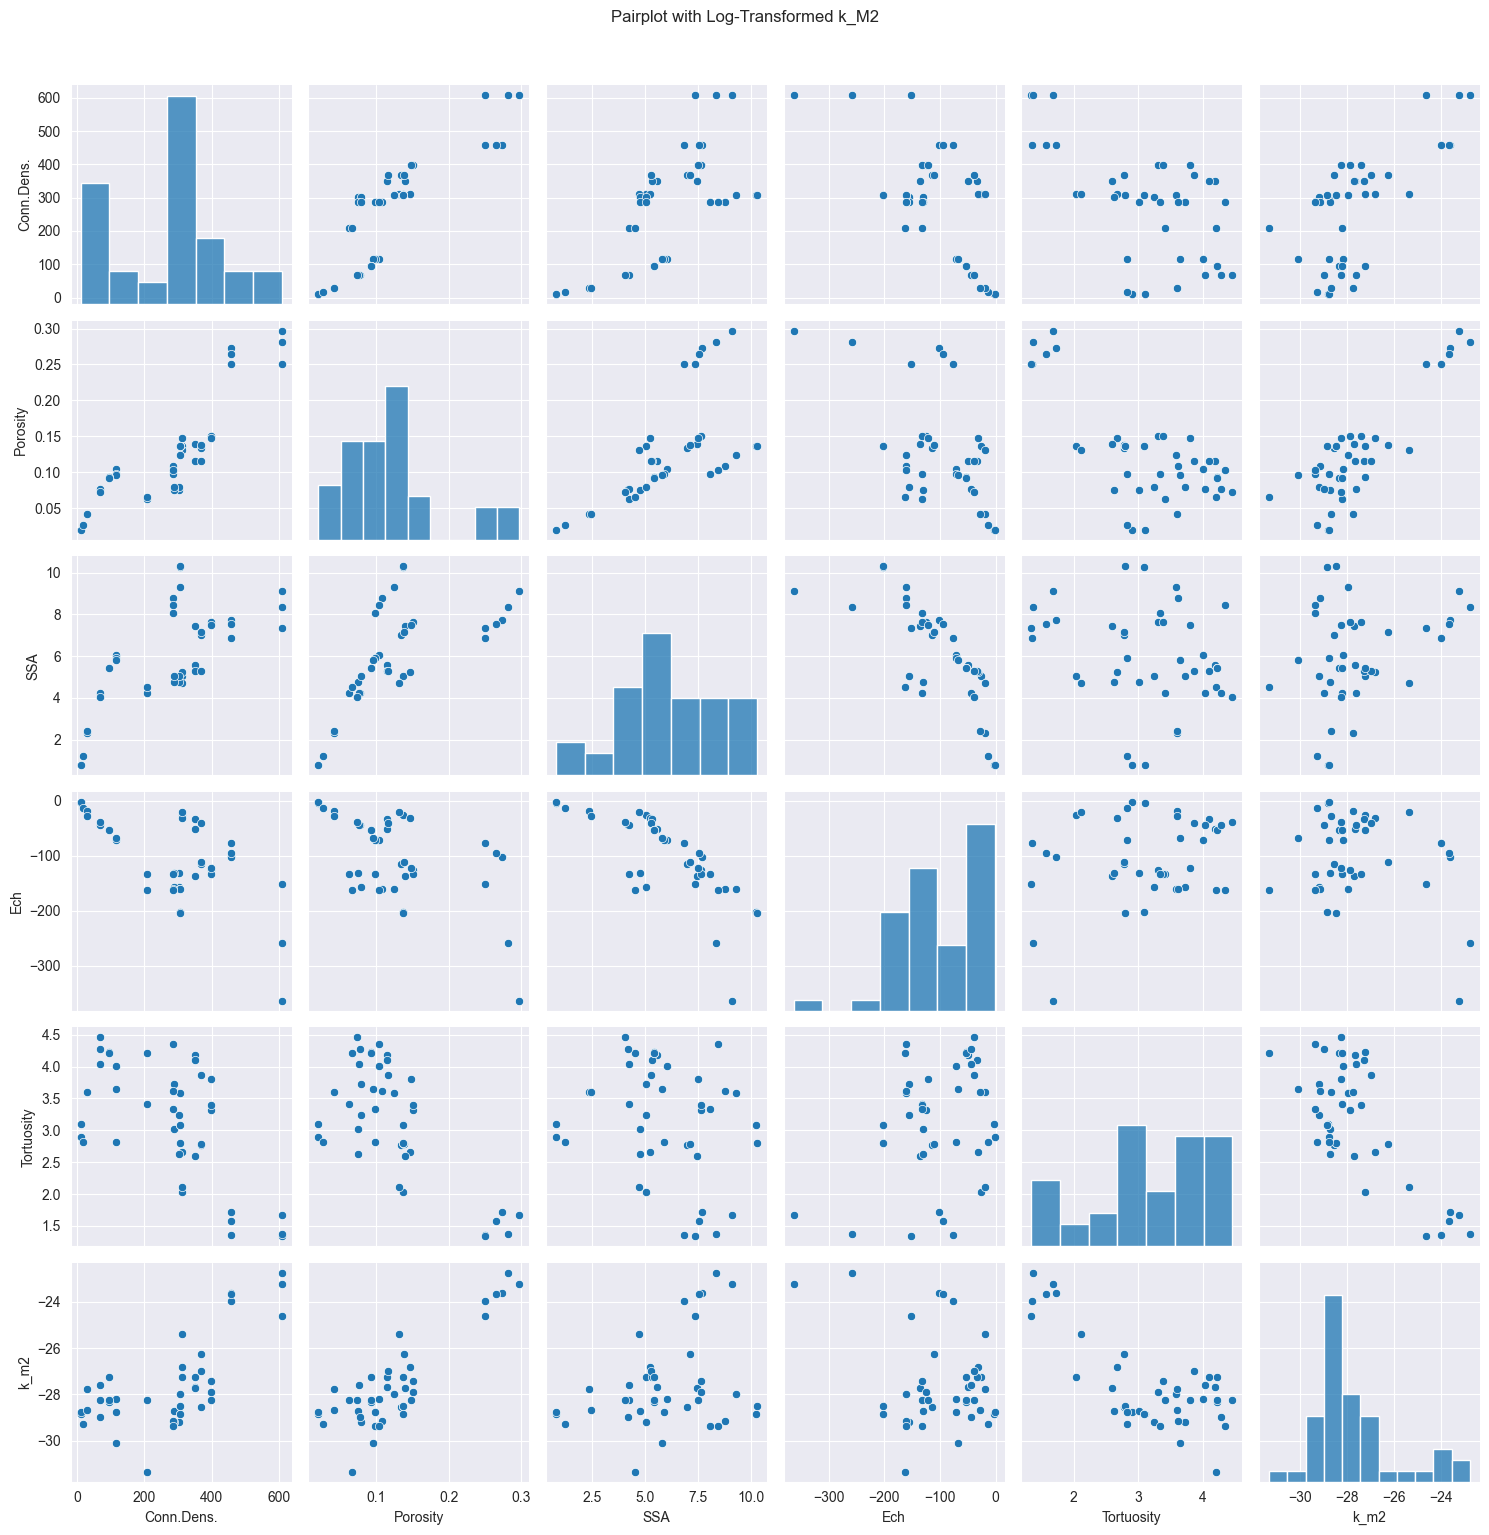

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea una copia del dataframe originale per applicare la log-trasformazione solo alla colonna 'k_m2'
df_logTransformed = df.copy()

# Applica la trasformazione logaritmica solo alla colonna target 'k_m2'
df_logTransformed['k_m2'] = np.log(df_logTransformed['k_m2'])

# Genera il pairplot
plt.figure(figsize=(11, 11))
sns.pairplot(df_logTransformed)
# Add title using plt.suptitle (which stands for 'super title' and places it above the plot grid)
plt.suptitle("Pairplot with Log-Transformed k_M2", y=1.02)  # Adjust 'y' to move the title further up
plt.tight_layout()  # To ensure there's no clipping of labels/titles
plt.show()


<Figure size 1100x1100 with 0 Axes>

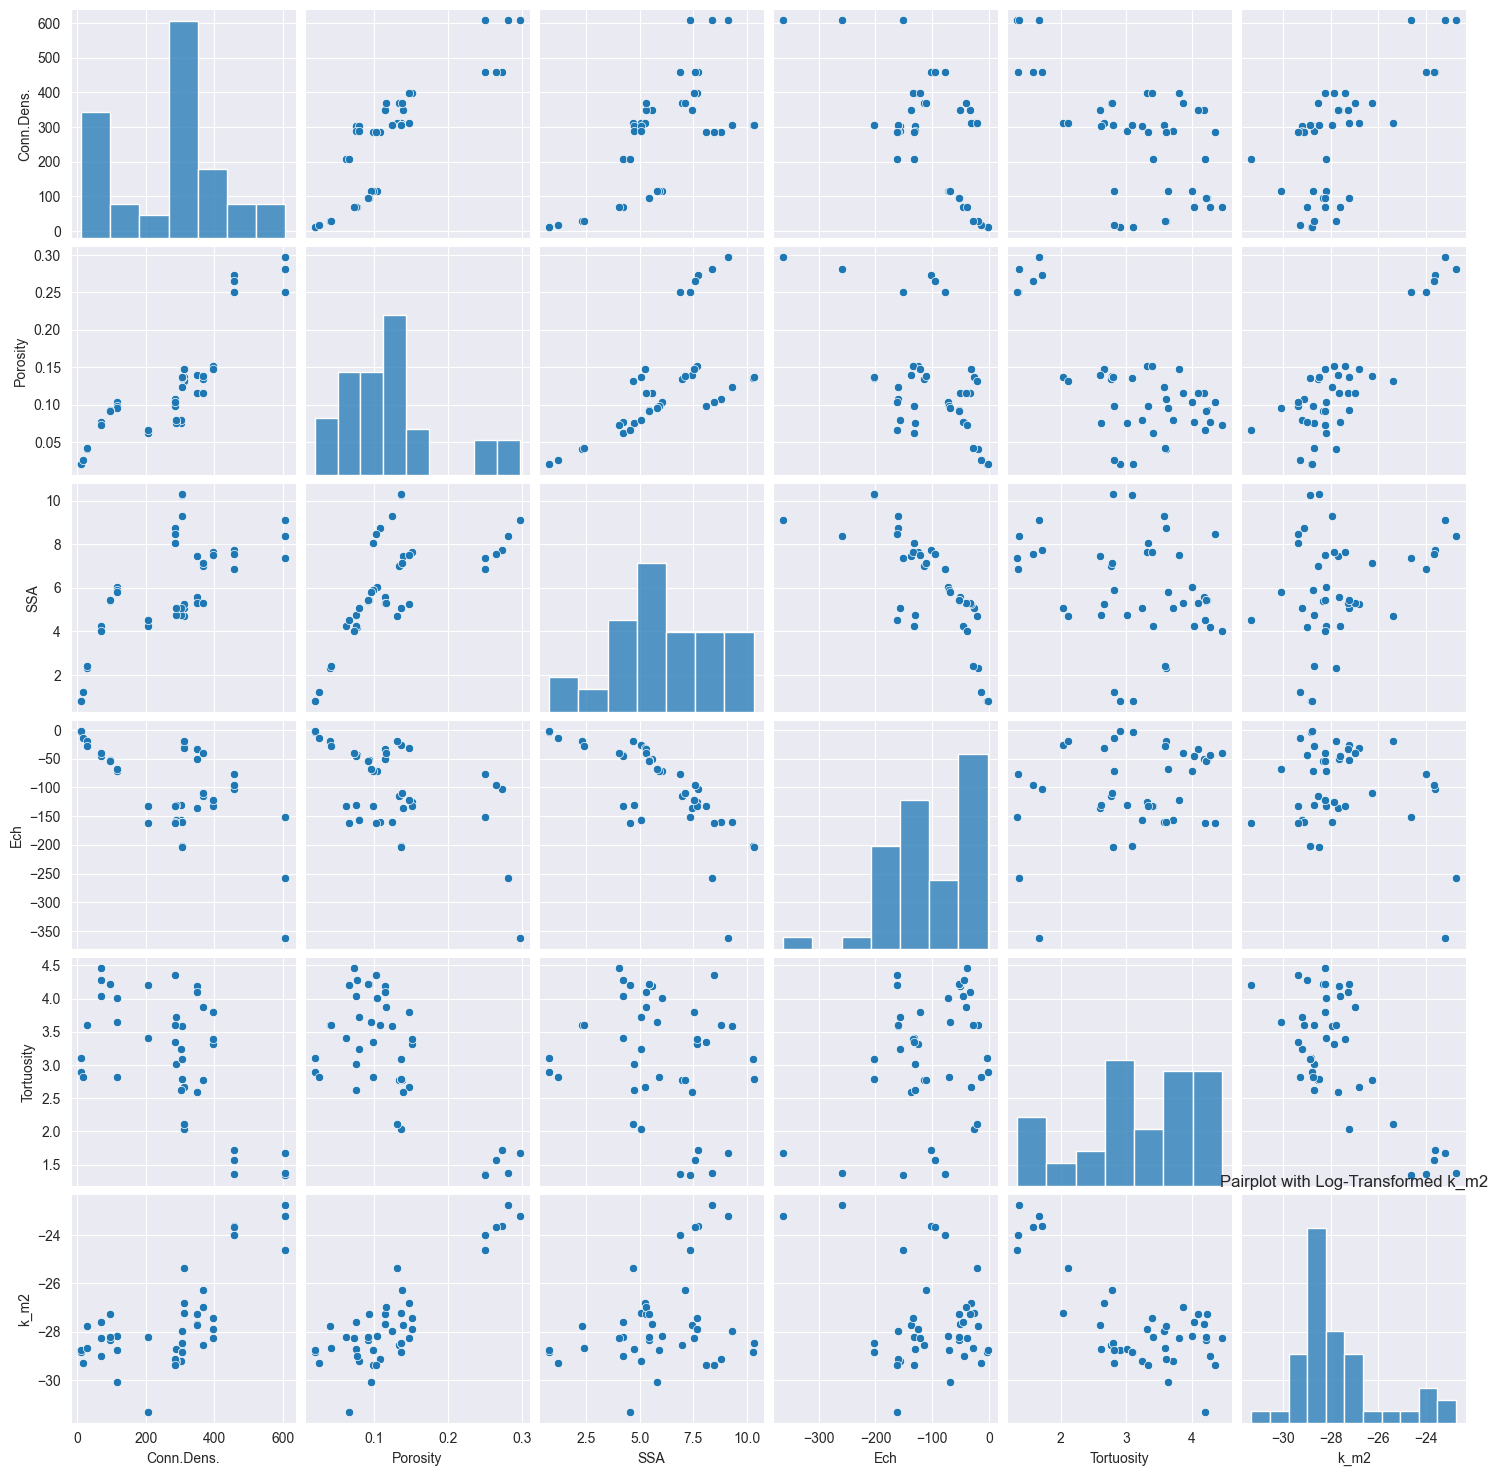

<Figure size 640x480 with 0 Axes>

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





plt.title('Pairplot with Log-Transformed k_m2')
# plt.savefig('pairplot_log_transformed_km2.png')  # Salva l'immagine
# plt.savefig('pairplot_log_transformed_km2.pdf', dpi=300)  # Salva il PDF
plt.show()

relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}pairplot.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}hyperParam_tuning.pdf', dpi=300)  # Salva il grafico come PDF



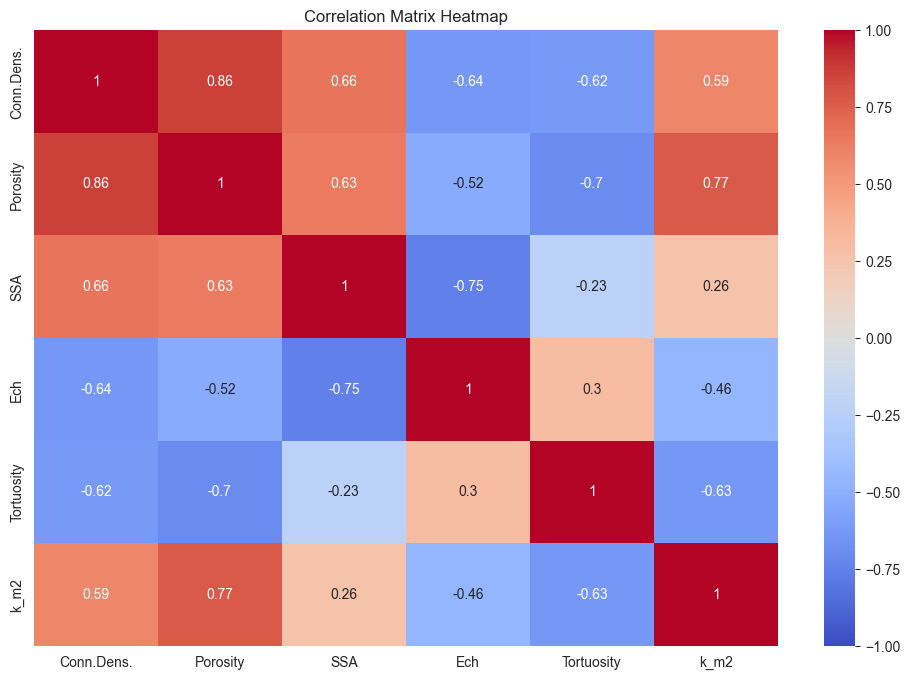

In [26]:
# Heatmap della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Eseguo lo scaler per tutto il dataset, in modo da effettuare lo scaler omogeneamente su tutti i valori
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_augmented)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df_augmented.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)


DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.429197  0.387136  0.933953    0.222573  0.010982
1     0.502894  0.464873  0.404165  0.919672    0.421501  0.016905
2     0.502894  0.407792  0.353803  0.950032    0.246217  0.072152
3     0.568572  0.350712  0.434057  0.865322    0.900063  0.007140
4     0.568572  0.436333  0.602897  0.626641    0.399433  0.006773
..         ...       ...       ...       ...         ...       ...
74    0.117715  0.020661  0.402441  0.831747    0.779319  0.000068
75    0.137703  0.037337  0.444532  0.461755    0.558638  0.001851
76    0.238377  0.092765  0.699844  0.989091    0.590164  0.001477
77    0.129436  0.035485  0.380905  0.870055    0.684741  0.001967
78    0.240157  0.093391  0.646688  0.782380    0.590164  0.001667

[79 rows x 6 columns]


In [46]:
# Questo sarà il dataset che utilizzeremo per la previsione finale (tutto meno che la colonna target)
df_scaled_forLastPrediction=df_scaled.drop(['k_m2'], axis=1)

In [29]:
df_scaled_forLastPrediction

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity
0,0.502894,0.429197,0.387136,0.933953,0.222573
1,0.502894,0.464873,0.404165,0.919672,0.421501
2,0.502894,0.407792,0.353803,0.950032,0.246217
3,0.568572,0.350712,0.434057,0.865322,0.900063
4,0.568572,0.436333,0.602897,0.626641,0.399433
...,...,...,...,...,...
74,0.117715,0.020661,0.402441,0.831747,0.779319
75,0.137703,0.037337,0.444532,0.461755,0.558638
76,0.238377,0.092765,0.699844,0.989091,0.590164
77,0.129436,0.035485,0.380905,0.870055,0.684741


Qui divido i due dataset per mantenere i dataset separati. Vanno ricreate le stesse condizioni per avere lo stesso splitting ed ottenere lo stesso test-set

In [47]:
# Recupera il numero di righe di ciascun DataFrame originale
n_rows_df = len(df)  # Numero di righe del primo DataFrame
n_rows_df_extra = len(df_extra_training)  # Numero di righe del secondo DataFrame

# Dividi il DataFrame scalato in due, usando l'informazione sulla lunghezza originale
df_scaled_part1 = df_scaled.iloc[:n_rows_df, :]  # Dati corrispondenti a df
df_scaled_part2 = df_scaled.iloc[n_rows_df:, :]  # Dati corrispondenti a df_extra_training

# Stampa i DataFrame risuddivisi
print("DataFrame scalato (parte 1 - df):")
print(df_scaled_part1)

print("\nDataFrame scalato (parte 2 - df_extra_training):")
print(df_scaled_part2)

DataFrame scalato (parte 1 - df):
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.429197  0.387136  0.933953    0.222573  0.010982
1     0.502894  0.464873  0.404165  0.919672    0.421501  0.016905
2     0.502894  0.407792  0.353803  0.950032    0.246217  0.072152
3     0.568572  0.350712  0.434057  0.865322    0.900063  0.007140
4     0.568572  0.436333  0.602897  0.626641    0.399433  0.006773
5     0.568572  0.350712  0.409419  0.914392    0.874212  0.010697
6     0.598718  0.418495  0.561502  0.686278    0.455864  0.002854
7     0.598718  0.432765  0.574364  0.699600    0.457440  0.029657
8     0.598718  0.354280  0.407517  0.895433    0.800757  0.014473
9     0.000000  0.011798  0.000000  0.994648    0.558638  0.002104
10    0.000000  0.011798  0.001359  1.000000    0.495586  0.002232
11    0.749909  0.914380  0.627715  0.721735    0.122636  0.417936
12    0.749909  0.832327  0.550632  0.793641    0.007881  0.289555
13    0.749909  0.885839  0.

In [48]:
#Dichiarazione dataset train 'X' e test 'y'
X = df_scaled_part1.drop('k_m2', axis=1)
y = df_scaled_part1['k_m2']
    
X_augmented = df_scaled_part2.drop('k_m2', axis=1)
y_augmented = df_scaled_part2['k_m2']

In [49]:
print(X.shape)
print(y.shape)
print(X_augmented.shape)
print(y_augmented.shape)


(47, 5)
(47,)
(32, 5)
(32,)


Questa fase viene eseguita la PCA analysis

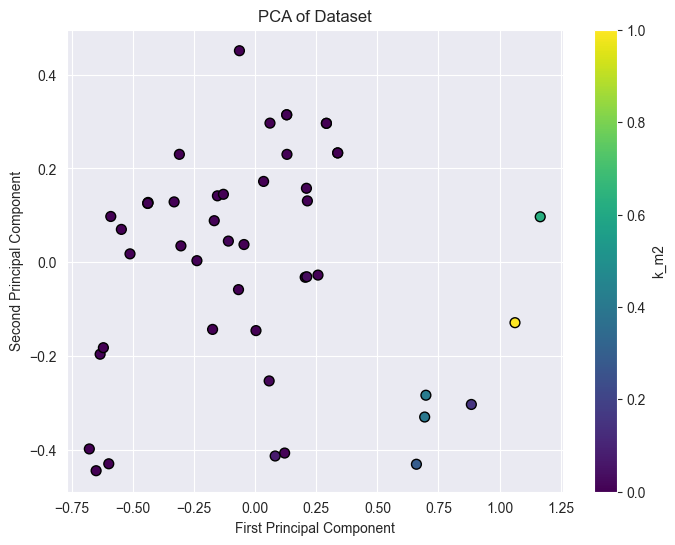

In [50]:
from sklearn.decomposition import PCA

#TODO: qui sarebbe carino vedere la PCA per ogni tipo di roccia

# Inizializzare la PCA e specificare il numero di componenti principali
pca = PCA(n_components=2)

# Adattare la PCA ai dati e trasformarli
X_pca = pca.fit_transform(X)

# Creare un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar(label='k_m2')
plt.grid(True)
plt.show()


In [51]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")


Explained variance by each component: [0.68816193 0.19306658]
Total explained variance: 0.881228514595892


Primo training grezzo per la ricerca del miglior random state

Random state: 0 - R^2 score: 0.18433169396317228 
MAE: 0.020207277398189154 -- MSE: 0.0024955112933563285 
Random state: 1 - R^2 score: 0.7301166405986141 
MAE: 0.03101169231170092 -- MSE: 0.00996539423244524 
Random state: 2 - R^2 score: 0.4201199983305123 
MAE: 0.04690492925630113 -- MSE: 0.013016861870878239 
Random state: 3 - R^2 score: 0.4403918759077299 
MAE: 0.06824332315807523 -- MSE: 0.02129523159859414 
Random state: 4 - R^2 score: 0.43424952736427325 
MAE: 0.0511870242418995 -- MSE: 0.01572021534806403 
Random state: 5 - R^2 score: 0.495628018467575 
MAE: 0.03391725620116983 -- MSE: 0.0045767713881426884 
Random state: 6 - R^2 score: -0.14720626984292196 
MAE: 0.04937512173144475 -- MSE: 0.01982656473268143 
Random state: 7 - R^2 score: 0.7643444605630807 
MAE: 0.03623186276575265 -- MSE: 0.008691231298205315 
Random state: 8 - R^2 score: 0.6495782668586805 
MAE: 0.03801847750561555 -- MSE: 0.01007916103423454 
Random state: 9 - R^2 score: 0.8049915599230003 
MAE: 0.03056406

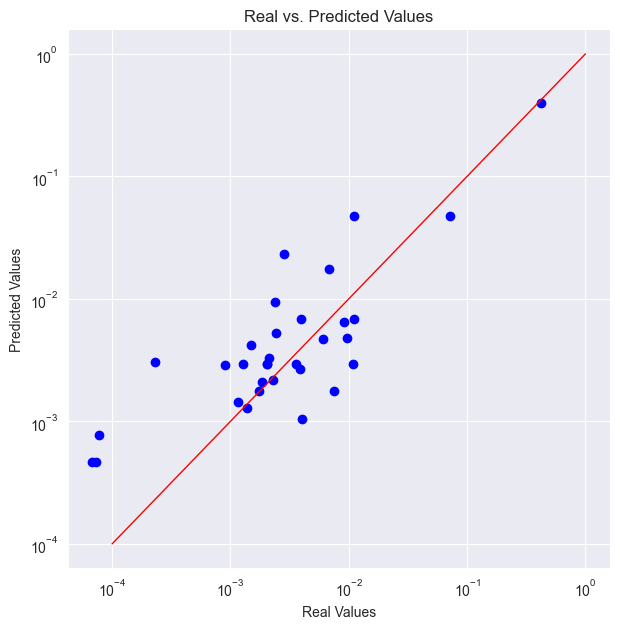

In [9]:
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')
best_X_test = None
best_X_train = None
best_y_train = None

scores = []
random_states = []

X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
        
    scores.append(score)
    random_states.append(random_state)

    print(f"Random state: {random_state} - R^2 score: {score} ")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)} -- MSE: {mean_squared_error(y_test, y_pred)} ")
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_test = y_test
        best_y_pred = y_pred
        best_X_test = X_test
        best_X_train = X_train
        best_y_train = y_train

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")

relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}preliminaryTraining.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}preliminaryTraining.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [10]:
print(len(best_y_test))

32


In [11]:
print(best_y_test)
print(best_y_pred)

17    0.002384
42    0.007556
33    0.001490
57    0.006083
29    0.002038
25    0.003930
46    0.002438
68    0.000893
41    0.001757
38    0.003578
73    0.000073
20    0.001381
47    0.000231
39    0.010879
0     0.010982
64    0.009739
75    0.001851
72    0.000077
26    0.002038
36    0.002266
4     0.006773
32    0.001153
6     0.002854
2     0.072152
74    0.000068
60    0.010979
21    0.004007
44    0.001272
24    0.009178
11    0.417936
43    0.003879
9     0.002104
Name: k_m2, dtype: float64
[0.00949091 0.00177413 0.00418935 0.00473378 0.00293592 0.00690447
 0.00528125 0.00286767 0.00177413 0.00292338 0.00046781 0.00128698
 0.00305063 0.00292338 0.04773398 0.00476651 0.00209116 0.00077926
 0.00293592 0.00217754 0.01738076 0.00145128 0.02308019 0.04773398
 0.00046781 0.00686634 0.00104412 0.0029153  0.00652409 0.40011853
 0.00265377 0.0032875 ]


In [16]:
print(best_X_train)
print(best_y_train)
print(X_augmented)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity
13    0.749909  0.885839  0.613132  0.742171    0.077238
1     0.502894  0.464873  0.404165  0.919672    0.421501
31    0.496416  0.382820  0.770016  0.559845    0.711538
12    0.749909  0.832327  0.550632  0.793641    0.007881
6     0.598718  0.418495  0.561502  0.686278    0.455864
30    0.496416  0.429197  0.861320  0.443032    0.462484
36    0.176860  0.290064  0.464854  0.809842    0.469735
32    0.461442  0.290064  0.660233  0.637746    0.634300
18    0.489861  0.222282  0.387136  0.572330    0.602144
16    1.000000  1.000000  0.754708  0.000000    0.109395
2     0.502894  0.407792  0.353803  0.950032    0.246217
45    0.029716  0.086716  0.140308  0.953654    0.717528
33    0.461442  0.325740  0.722280  0.560352    0.719105
43    0.097330  0.200876  0.293840  0.896736    0.987074
29    0.496416  0.425630  0.858331  0.445617    0.554540
24    0.647493  0.479143  0.621556  0.637042    0.650063
37    0.176860  0.282929  0.454

Ora riunisco l'attuale TRAINING set + il dataset extra (che andrà a rafforzare l'allenamento)

In [54]:
#Unisco i set di train, dei due dataset. Solo una volta che il primo set di train 

df_augmented_X = pd.concat([best_X_train, X_augmented], ignore_index=True)
df_augmented_y = pd.concat([best_y_train, y_augmented], ignore_index=True)

#Print
df_augmented_X

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity
0,0.749909,0.885839,0.613132,0.742171,0.077238
1,0.502894,0.464873,0.404165,0.919672,0.421501
2,0.496416,0.382820,0.770016,0.559845,0.711538
3,0.749909,0.832327,0.550632,0.793641,0.007881
4,0.598718,0.418495,0.561502,0.686278,0.455864
...,...,...,...,...,...
64,0.117715,0.020661,0.402441,0.831747,0.779319
65,0.137703,0.037337,0.444532,0.461755,0.558638
66,0.238377,0.092765,0.699844,0.989091,0.590164
67,0.129436,0.035485,0.380905,0.870055,0.684741


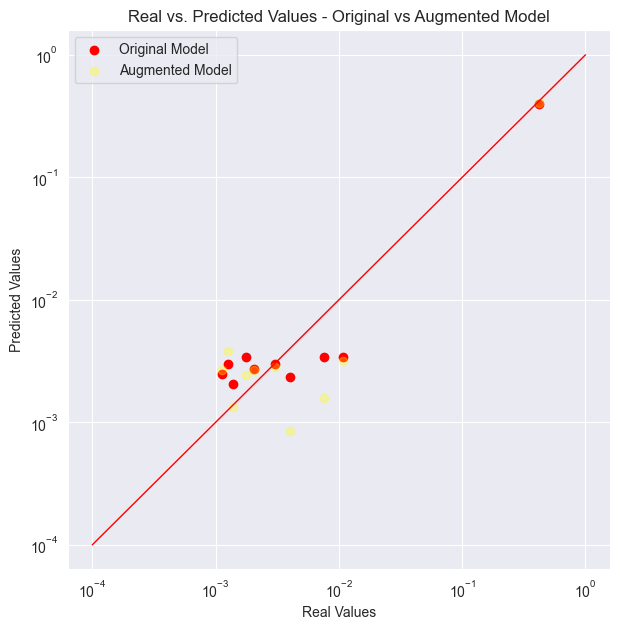

R^2 score: 0.997342781327955 

MSE: 4.106553854520729e-05
MAE: 0.003971909327311918


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = XGBRegressor()      # Creo un altro modello, ma sovrascrivo tranquillamente quello precedente
model.fit(df_augmented_X, df_augmented_y)

y_pred_SecondModel = model.predict(best_X_test)
score = r2_score(best_y_test, y_pred_SecondModel)
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Visualizzare la differenza tra i due modelli (opzionale ma utile)
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='red', label='Original Model')  # Modello originale
plt.scatter(best_y_test, y_pred_SecondModel, color='yellow', label='Augmented Model', alpha=0.3)  # Modello con dati extra
plt.plot([10 ** -4, 10 ** 0], [10 ** -4, 10 ** 0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values - Original vs Augmented Model')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)
plt.legend()
plt.show()

print(f"R^2 score: {score} \n")
print(f"MSE: {mean_squared_error(best_y_test, y_pred_SecondModel)}")
print(F"MAE: {mean_absolute_error(best_y_test, y_pred_SecondModel)}")


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=best_random_state_split)
    
model = XGBRegressor(random_state = best_random_state_split)


Hyperparameter tuning

Fitting 10 folds for each of 5832 candidates, totalling 58320 fits
Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.6}
R^2 score: 0.9662734564841766
MSE: 0.0001783977185626843
MAE: 0.008857864288584845
Grafico dell'allenamento effettuato


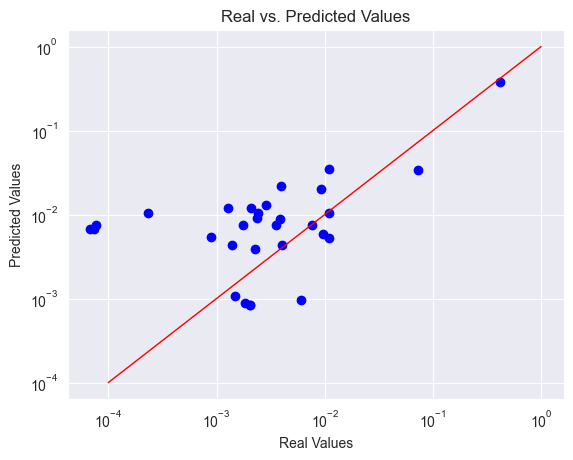

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from tqdm import tqdm
import joblib

param_grid = {
    'n_estimators': [50, 100, 200],              # Numero di alberi
    'learning_rate': [0.001, 0.01, 0.1],     # Velocità di apprendimento
    'max_depth': [5, 7, 10],                  # Profondità massima di ogni albero
    'min_child_weight': [1, 3],               # Peso minimo per i campioni foglia
    'subsample': [0.6, 0.8, 1.0],                # Percentuale di campioni per albero
    'colsample_bytree': [0.6, 0.8, 1.0],         # Percentuale di caratteristiche da campionare per albero
    'gamma': [0, 0.1, 0.3],                 # Regularizzazione
    'reg_alpha': [0, 0.1],                    # L1 regularizzazione
    'reg_lambda': [1, 2],                   # L2 regularizzazione
}


best_r2=None

with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2}")
print(f"MSE: {mean_squared_error(best_y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(best_y_test, y_pred)}")

print("Grafico dell'allenamento effettuato\n\n")
plt.scatter(y_test, y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia
plt.show()

# if(r2>best_r2):
#     best_r2=r2
#     best_model=best_model
#     best_y_pred=y_pred
#     best_Y_test=best_y_test
#     best_cv=cv


# relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
# relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# # Assicurati che la directory esista
# os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
# os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

# # Salva il grafico come immagine PNG
# plt.savefig(f'{relative_path_png}hyperParam_tuning.png')  # Salva il grafico come immagine PNG
# # Salva il grafico come PDF
# plt.savefig(f'{relative_path_pdf}hyperParam_tuning.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [16]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': y_pred       #Valori predetti con modello aggiornato
})


# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
17      0.002384         0.009162
42      0.007556         0.007575
33      0.001490         0.001086
57      0.006083         0.000958
29      0.002038         0.000846
25      0.003930         0.021627
46      0.002438         0.010552
68      0.000893         0.005363
41      0.001757         0.007575
38      0.003578         0.007575
73      0.000073         0.006729
20      0.001381         0.004316
47      0.000231         0.010552
39      0.010879         0.005329
0       0.010982         0.034429
64      0.009739         0.005937
75      0.001851         0.000884
72      0.000077         0.007575
26      0.002038         0.000846
36      0.002266         0.003936
4       0.006773        -0.022298
32      0.001153        -0.004056
6       0.002854         0.012830
2       0.072152         0.034101
74      0.000068         0.006729
60      0.010979         0.010480
21      0.004007         0.004316
44      0.001

In [14]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': best_y_pred       #valori predetti con modello preliminare (obsoleto)
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.002037
41      0.001757         0.003423
34      0.001132         0.002500
42      0.007556         0.003384
26      0.002038         0.002743
44      0.001272         0.002986
21      0.004007         0.002354
27      0.003040         0.002968
39      0.010879         0.003423
11      0.417936         0.399757


In [22]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df_scaled.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA        Ech  Tortuosity       k_m2
count   79.000000  79.000000  79.000000  79.000000   79.000000  79.000000
mean     0.392498   0.393084   0.452699   0.686632    0.567874   0.068294
std      0.292614   0.271323   0.246671   0.209746    0.275792   0.173688
min      0.000000   0.000000   0.000000   0.000000    0.000000   0.000000
25%      0.117715   0.208011   0.310687   0.524757    0.414565   0.001804
50%      0.461442   0.382820   0.421375   0.668411    0.590164   0.004007
75%      0.598718   0.466656   0.617299   0.875461    0.767103   0.013567
max      1.000000   1.000000   1.000000   1.000000    1.000000   1.000000


Valutazione del modello
- QQ plot
- Residual plot
- Feature importance
- Bias-Variance Tradeoff 

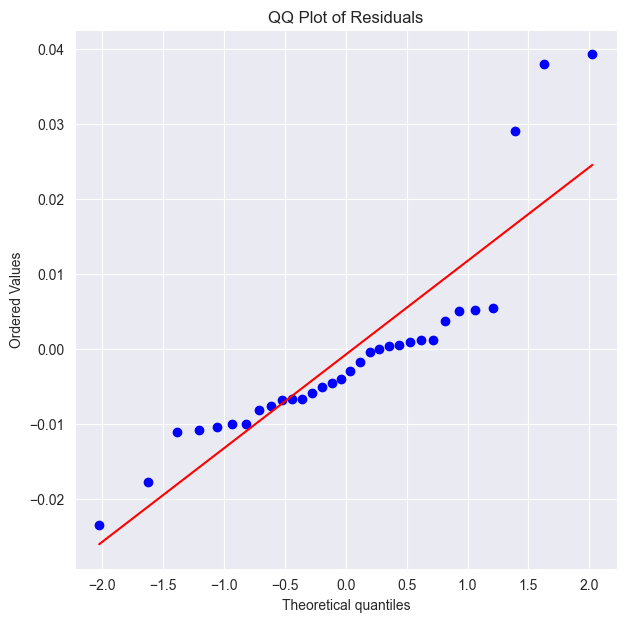

In [17]:
##  - QQ PLOT -
import scipy.stats as stats

# Verifica che le lunghezze di best_y_test e best_y_pred siano uguali
if len(best_y_test) != len(y_pred):
    raise ValueError("Le lunghezze di best_y_test e best_y_pred non sono uguali!")

# Calcola i residui
residuals = best_y_test - y_pred

# Genera i valori per il QQ plot senza disegnarlo
(theoretical_quantiles, ordered_values), (slope, intercept, r) = stats.probplot(residuals, dist="norm")

# Crea un DataFrame per visualizzare i valori in due colonne
df_qq = pd.DataFrame({
    'Theoretical Quantiles': theoretical_quantiles,
    'Ordered Values (Residuals)': ordered_values
})


plt.figure(figsize=(7, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.grid(True)

# # Salva il grafico come immagine PNG
# plt.savefig(f'{relative_path_png}qq.png')  # Salva il grafico come immagine PNG
# # Salva il grafico come PDF
# plt.savefig(f'{relative_path_pdf}qq.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()


In [18]:
df_qq


,Theoretical Quantiles,Ordered Values (Residuals)
0,-2.025112,-0.023447
1,-1.625903,-0.017697
2,-1.385939,-0.011009
3,-1.206666,-0.010795
4,-1.059536,-0.010321
5,-0.932359,-0.009976
6,-0.818720,-0.009925
7,-0.714786,-0.008114
8,-0.618059,-0.007498
9,-0.526801,-0.006778


    Theoretical Quantiles  Ordered Values (Residuals)
17               0.009162                   -0.006778
42               0.007575                   -0.000020
33               0.001086                    0.000404
57               0.000958                    0.005125
29               0.000846                    0.001192
25               0.021627                   -0.017697
46               0.010552                   -0.008114
68               0.005363                   -0.004470
41               0.007575                   -0.005818
38               0.007575                   -0.003997
73               0.006729                   -0.006655
20               0.004316                   -0.002936
47               0.010552                   -0.010321
39               0.005329                    0.005550
0                0.034429                   -0.023447
64               0.005937                    0.003801
75               0.000884                    0.000967
72               0.007575   

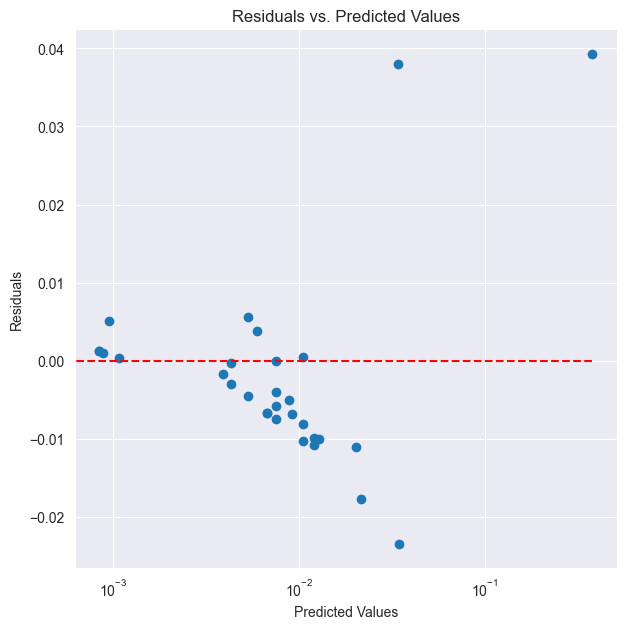

In [19]:
# Crea un DataFrame per visualizzare i valori in due colonne
df_residuals = pd.DataFrame({
    'Theoretical Quantiles': y_pred,
    'Ordered Values (Residuals)': residuals
})
# Stampa il DataFrame
print(df_residuals)


# Residual plot
plt.figure(figsize=(7, 7))
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xscale('log', base=10)
plt.title('Residuals vs. Predicted Values')
plt.grid(True)


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}final_train.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}final_train.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

In [76]:
df_residuals

,Theoretical Quantiles,Ordered Values (Residuals)
20,0.001819,-0.000438
41,0.003491,-0.001733
34,0.003761,-0.002629
42,0.001799,0.005756
26,0.003023,-0.000986
44,0.005065,-0.003793
21,0.001667,0.002340
27,0.003991,-0.000951
39,0.003720,0.007159
11,0.462731,-0.044795


      Feature  Importance
0  Conn.Dens.    0.132766
1    Porosity    0.412401
2         SSA    0.009717
3         Ech    0.223935
4  Tortuosity    0.221182


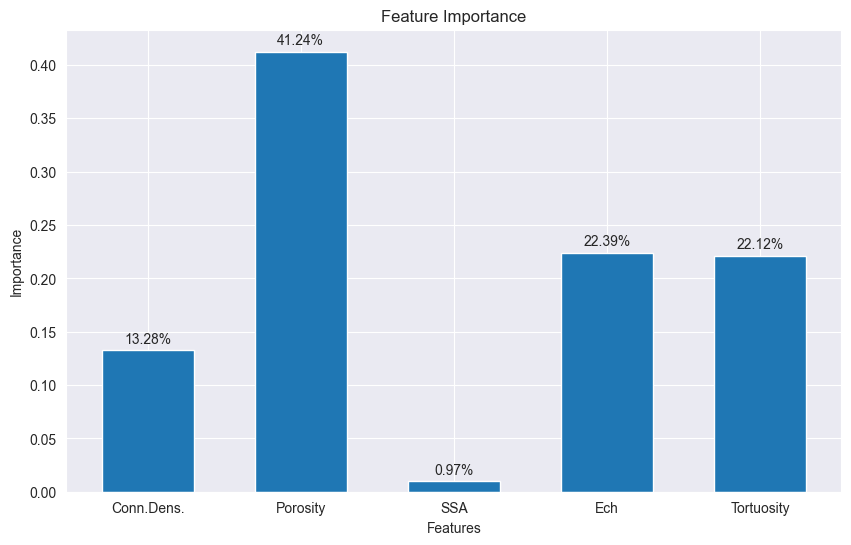

In [21]:
import matplotlib.pyplot as plt

# Crea un DataFrame per visualizzare i valori in modo chiaro
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})

# Stampa il DataFrame
print(df_feature_importance)

# Example code to plot feature importance with values annotated on each bar
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.6  # Reduce this value to make the bars narrower

# Plot the bars with the specified width
bars = plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_, width=bar_width)
plt.xticks(range(len(best_model.feature_importances_)), X.columns, rotation=0)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)

# Annotate the bars with the importance values as percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')


# # Salva il grafico come immagine PNG
# plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# # Salva il grafico come PDF
# plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

In [73]:
df_feature_importance

,Feature,Importance
0,Conn.Dens.,0.020792
1,Porosity,0.763816
2,SSA,0.002900
3,Ech,0.105331
4,Tortuosity,0.107162


Questo è il corretto modello di Bias-Variance Tradeoff

C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\model_selection\_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 70 instead of 79.
  warnings.warn(


Training Scores:
    Training examples       MSE
0                   7  0.000489
1                   8  0.000443
2                   9  0.000506
3                  10  0.000504
4                  11  0.000437
..                ...       ...
65                 72  0.000300
66                 73  0.000298
67                 74  0.000294
68                 75  0.000291
69                 76  0.000286

[70 rows x 2 columns]

Cross-validation Scores:
    Training examples       MSE
0                   7  0.029866
1                   8  0.029731
2                   9  0.029796
3                  10  0.028877
4                  11  0.028645
..                ...       ...
65                 72  0.011804
66                 73  0.011892
67                 74  0.011923
68                 75  0.012070
69                 76  0.012057

[70 rows x 2 columns]


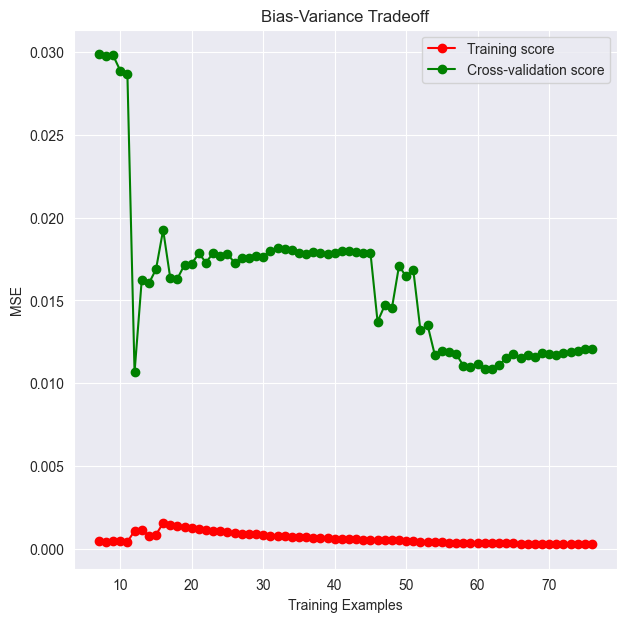

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
# Bias-Variance plot with MSE
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=33, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, len(X))
)

train_scores_mean = -np.mean(train_scores, axis=1)  # Invert sign for positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)

# Crea due DataFrame separati per visualizzare i punteggi di Training e di Cross-validation
df_train_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': train_scores_mean
})
df_test_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': test_scores_mean
})
# Stampa i DataFrame per visualizzare i dati
print("Training Scores:")
print(df_train_scores)
print("\nCross-validation Scores:")
print(df_test_scores)

plt.figure(figsize=(7, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
# plt.yscale('log', base=10)
plt.title('Bias-Variance Tradeoff')
plt.legend(loc='best')
plt.grid(True)
# 
# # Salva il grafico come immagine PNG
# plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# # Salva il grafico come PDF
# plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()


In [23]:
df_train_scores

,Training examples,MSE
0,7,0.000489
1,8,0.000443
2,9,0.000506
3,10,0.000504
4,11,0.000437
...,...,...
65,72,0.000300
66,73,0.000298
67,74,0.000294
68,75,0.000291


In [24]:
df_test_scores

,Training examples,MSE
0,7,0.029866
1,8,0.029731
2,9,0.029796
3,10,0.028877
4,11,0.028645
...,...,...
65,72,0.011804
66,73,0.011892
67,74,0.011923
68,75,0.012070


In [26]:
X

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity
0,0.502894,0.429197,0.387136,0.933953,0.222573
1,0.502894,0.464873,0.404165,0.919672,0.421501
2,0.502894,0.407792,0.353803,0.950032,0.246217
3,0.568572,0.350712,0.434057,0.865322,0.900063
4,0.568572,0.436333,0.602897,0.626641,0.399433
...,...,...,...,...,...
74,0.117715,0.020661,0.402441,0.831747,0.779319
75,0.137703,0.037337,0.444532,0.461755,0.558638
76,0.238377,0.092765,0.699844,0.989091,0.590164
77,0.129436,0.035485,0.380905,0.870055,0.684741


Qui proviamo a prevedere tutta la colonna "k_m2_predicted" ed estrapoliamo il csv


In [27]:

# il modello adesso prevede k_m2 per ogni record
y_pred_tot = best_model.predict(X)

# Aggiungo la colonna delle predizioni al dataset
X['k_m2_predetto'] = y_pred_tot

# Visualizza il dataset con la nuova colonna
X


,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2_predetto
0,0.502894,0.429197,0.387136,0.933953,0.222573,0.034429
1,0.502894,0.464873,0.404165,0.919672,0.421501,0.012525
2,0.502894,0.407792,0.353803,0.950032,0.246217,0.034101
3,0.568572,0.350712,0.434057,0.865322,0.900063,0.003885
4,0.568572,0.436333,0.602897,0.626641,0.399433,-0.022298
...,...,...,...,...,...,...
74,0.117715,0.020661,0.402441,0.831747,0.779319,0.006729
75,0.137703,0.037337,0.444532,0.461755,0.558638,0.000884
76,0.238377,0.092765,0.699844,0.989091,0.590164,0.005524
77,0.129436,0.035485,0.380905,0.870055,0.684741,0.007575



Denormalizzazione di tutto il dataset di training prima dell'export


In [28]:
#Denormalizzo tutto
df_denormalizzato = scaler.inverse_transform(X)

# Converti di nuovo in DataFrame
df_denormalizzato = pd.DataFrame(df_denormalizzato, columns=X.columns)

# Visualizza il dataset denormalizzato
df_denormalizzato

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2_predetto
0,310.9130,0.137000,5.065000,-25.849000,2.034,4.566630e-12
1,310.9130,0.147000,5.253000,-31.002000,2.665,1.676914e-12
2,310.9130,0.131000,4.697000,-20.047000,2.109,4.523298e-12
3,350.1370,0.115000,5.583000,-50.613000,4.183,5.371332e-13
4,350.1370,0.139000,7.447000,-136.737000,2.595,-2.917074e-12
...,...,...,...,...,...,...
74,80.8750,0.022484,5.233959,-62.728037,3.800,9.122357e-13
75,92.8125,0.027159,5.698655,-196.233125,3.100,1.412377e-13
76,152.9375,0.042696,8.517298,-5.953272,3.200,7.532843e-13
77,87.8750,0.026640,4.996205,-48.905390,3.500,1.023922e-12


In [30]:
export_path='C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/model/Ech/'
df_denormalizzato.to_csv(f"{export_path}dataset_con_predizioni.csv", index=False)


Procedo a salvare il modello


In [33]:
import pickle

# Percorso completo con nome del file
save_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/modello_addestrato.pkl'

# Salva il modello su disco
with open(save_path, 'wb') as file:
    pickle.dump(best_model, file)




Import del modello per utilizzarlo in futuro

In [34]:
save_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/modello_addestrato.pkl'
# Carica il modello dal file
with open(save_path, 'rb') as file:
    best_model_caricato = pickle.load(file)



In [37]:

# Usa il modello caricato per fare nuove predizioni
# Inserire il dataset da predirre al posto di 'nuovi_dati_??' --- verificare formato corretto delle colonne
nuove_predizioni = best_model_caricato.predict(df_scaled_forLastPrediction)

nuove_predizioni

array([ 4.1247882e-02,  1.5843978e-02,  5.9754819e-02,  8.5605420e-03,
        7.5246119e-03,  9.6499696e-03,  1.0914554e-02,  2.0399779e-02,
        1.4292924e-02,  4.6962867e-03,  4.6962867e-03,  4.6273062e-01,
        2.7757612e-01,  3.8977733e-01,  2.4538702e-01,  6.7747813e-01,
        5.9419328e-01,  5.6766137e-03,  1.9227182e-03,  1.3839171e-03,
        1.8188945e-03,  1.6673664e-03,  2.0918818e-03,  8.6645177e-03,
        7.6263482e-03,  8.0790156e-03,  3.0234125e-03,  3.9905389e-03,
        5.6009637e-03,  3.0234125e-03,  3.9905389e-03,  5.6009637e-03,
        2.2533645e-03,  2.4205500e-03,  3.7614116e-03,  5.1132385e-03,
        2.0802519e-03,  1.9131140e-03,  3.7201098e-03,  3.7201098e-03,
        3.7201098e-03,  3.4908769e-03,  1.7994394e-03,  3.5410556e-03,
        5.0647748e-03,  5.6596608e-03,  1.6018513e-03,  1.2930142e-03,
        2.5146303e-01,  7.2320759e-02,  8.4630139e-02,  4.0514725e-01,
        5.6913173e-01,  5.9419328e-01,  1.0347574e-01,  5.5798799e-02,
      




Code to be lefted here. Logiche che possono servire in futuro

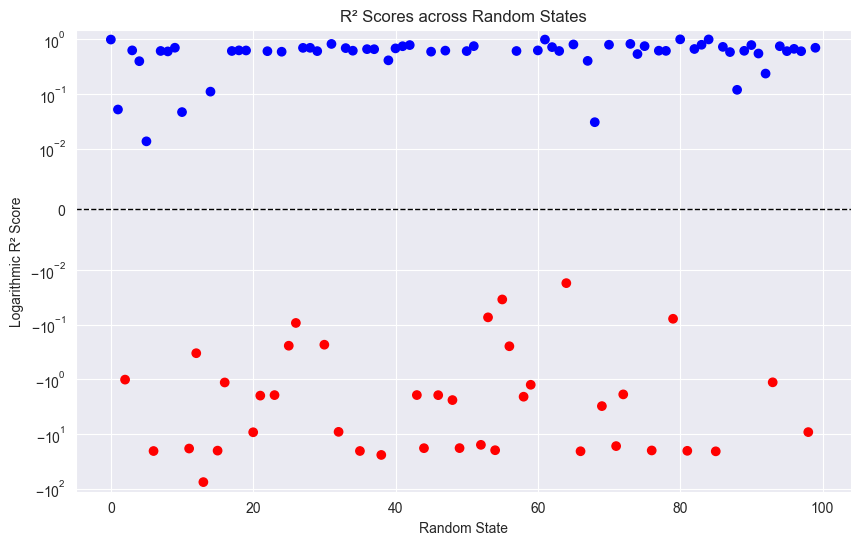

In [54]:
#Qui viene plottato l'R2 di ogni random state e viene visualizzato il valore di ognuno, per evidenziare quanti < 0 e quanti 0 > x > 1

# Scatter plot con scala simmetrica logaritmica
plt.figure(figsize=(10, 6))
plt.scatter(random_states, scores, color=['red' if s < 0 else 'blue' for s in scores])  # Rosso per R² negativi, blu per positivi
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Linea di riferimento a R² = 0
plt.xlabel('Random State')

plt.ylabel('Logarithmic R² Score')
plt.ylim(min(scores) * 1.5, max(scores) * 1.5)  # Espandi i limiti dell'asse Y

plt.yscale('symlog', base=10, linthresh=0.01)  # Imposta la scala logaritmica simmetrica, con scala lineare per valori vicino a zero
plt.title('R² Scores across Random States')
plt.grid(True)
plt.show()